In [243]:
from matplotlib import pyplot as plt 
from matplotlib import image as img
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [244]:
# import original image, get the size of the image
im_original = img.imread('../Resource/sample.JPG')
(x, y, z) =im_original.shape  # Get the width and hight of the image 

In [245]:
# get image data, reshape to list of pixels of RGB
im_data_transformed = im_original.reshape(x * y, z) 
R = im_original[:,:,0]
G = im_original[:,:,1]
B = im_original[:,:,2]

In [247]:
R.shape

(600, 800)

In [301]:
pca = PCA(0.9)

In [302]:
R_lower_dimensional_data = pca.fit_transform(R)

In [303]:
pca.n_components_

34

In [304]:
R_approximation = pca.inverse_transform(R_lower_dimensional_data)

In [305]:
G_lower_dimensional_data = pca.fit_transform(G)

In [306]:
pca.n_components_

39

In [307]:
G_approximation = pca.inverse_transform(G_lower_dimensional_data)

In [308]:
B_lower_dimensional_data = pca.fit_transform(B)

In [309]:
pca.n_components_

23

In [310]:
B_approximation = pca.inverse_transform(B_lower_dimensional_data)

In [311]:
B_approximation.shape

(600, 800)

In [332]:
RGB_approximation = np.stack((np.array(R_approximation), np.array(G_approximation), np.array(B_approximation)),axis = 2)/255

In [333]:
#RGB_approximation.astype("int")

In [334]:
B_approximation

array([[185.22952209, 195.11599361, 191.01385477, ..., 146.08549709,
        146.18073251, 145.37189307],
       [185.85539353, 196.96873232, 193.17443962, ..., 153.65172116,
        153.57898659, 152.28965734],
       [187.78285977, 198.07108581, 192.57758862, ..., 156.64221022,
        156.43063256, 155.66884635],
       ...,
       [ 31.91012276,  37.02212129,  35.29308667, ...,  66.3348224 ,
         35.71164415,  37.57087269],
       [ 35.06757241,  40.67776547,  38.69714313, ...,  65.5707062 ,
         34.87071188,  36.94544624],
       [ 36.14430514,  40.56407558,  37.40844872, ...,  65.54299222,
         34.21293561,  36.70643419]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


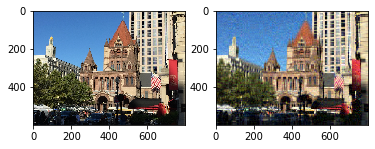

In [335]:
# a comparison of original and compressed
fig, ax = plt.subplots(1,2)
ax[0].imshow(im_original);
ax[1].imshow(RGB_approximation);

In [337]:
#plt.imsave("sample_Matplotlib_compressed.JPG", RGB_approximation)

ValueError: Floating point image RGB values must be in the 0..1 range.

In [328]:
print(pca.singular_values_)

[39704.60334756 13703.41670902 11132.97380584  7395.61298629
  7224.89783797  6267.62743479  5950.82930085  5411.29658356
  5144.3461095   4667.91331978  4236.14890022  4114.83634404
  3960.69483838  3753.0580141   3547.20271946  3472.47530086
  3294.30975609  3125.91294861  2945.13478948  2896.81191343
  2872.90253218  2758.19525704  2623.59303661]


In [146]:
# select 16 colors to represent all pixels
km = KMeans(
    n_clusters=16, init='random',
    n_init=10, max_iter=100, 
    tol=1e-04, random_state=0
)
km.fit_predict(im_data_transformed)
# km.labels_ as assigments for each pixel, km.clueter_centers_ as selected colors

array([ 1,  1,  1, ...,  7, 14,  0], dtype=int32)

In [147]:
# transform centroids to 255 scale
centroids = (km.cluster_centers_* 255).astype("uint8")

In [148]:
# transform to DataFrames
df_centroids = pd.DataFrame(centroids)

df_pixels = pd.DataFrame(km.labels_)
df_pixels["Index"] = df_pixels.index

In [149]:
# merge two DataFrames, sort by pixel position, select relevant columns
df_combined = df_pixels.merge(df_centroids, how = "inner", left_on = 0, right_index = True )

df_combined_sort = df_combined.sort_values(by = ["Index"])

df_combined_sort_select = df_combined_sort.iloc[:,3:]

In [150]:
# transform back to image shape and save impage
im_compressed = np.reshape(df_combined_sort_select.values,(x,y,z))